<a href="https://colab.research.google.com/github/Petint/AI-and-DS/blob/main/AI-1/ai-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI 1


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
#gtgg

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [7]:
uniqe, count = np.unique(x_train, return_counts=True)
print("Train labels: ", dict(zip(uniqe, count)))

Train labels:  {0: 38045844, 1: 22896, 2: 33653, 3: 36040, 4: 38267, 5: 39148, 6: 37692, 7: 38856, 8: 30878, 9: 38234, 10: 35282, 11: 36020, 12: 30139, 13: 40100, 14: 26939, 15: 28869, 16: 29115, 17: 27551, 18: 26849, 19: 34431, 20: 29955, 21: 35496, 22: 26750, 23: 22910, 24: 25950, 25: 29995, 26: 24260, 27: 24025, 28: 25434, 29: 37160, 30: 22913, 31: 26205, 32: 28890, 33: 15556, 34: 19906, 35: 21516, 36: 22128, 37: 24760, 38: 25922, 39: 18250, 40: 20675, 41: 27023, 42: 22349, 43: 21227, 44: 19030, 45: 21122, 46: 17326, 47: 24237, 48: 20083, 49: 17919, 50: 23964, 51: 25003, 52: 14588, 53: 19230, 54: 18195, 55: 18068, 56: 23511, 57: 31905, 58: 14330, 59: 18140, 60: 18144, 61: 18133, 62: 19805, 63: 23909, 64: 46754, 65: 16050, 66: 17514, 67: 15914, 68: 16302, 69: 16742, 70: 19288, 71: 18444, 72: 17313, 73: 19307, 74: 13816, 75: 15875, 76: 17877, 77: 13535, 78: 17569, 79: 18085, 80: 15872, 81: 16527, 82: 21112, 83: 15514, 84: 27088, 85: 25496, 86: 25837, 87: 12645, 88: 15796, 89: 17628, 9

In [8]:
uniqe, count = np.unique(x_test, return_counts=True)
print("Test labels: ", dict(zip(uniqe, count)))

Test labels:  {0: 6328781, 1: 3832, 2: 5756, 3: 6100, 4: 6371, 5: 6635, 6: 6236, 7: 6587, 8: 4952, 9: 6412, 10: 6055, 11: 5832, 12: 4956, 13: 6808, 14: 4436, 15: 4707, 16: 4789, 17: 4477, 18: 4584, 19: 5911, 20: 5113, 21: 6097, 22: 4774, 23: 3685, 24: 4239, 25: 4993, 26: 4051, 27: 3884, 28: 4098, 29: 5828, 30: 3818, 31: 4281, 32: 4805, 33: 2634, 34: 3214, 35: 3441, 36: 3655, 37: 4109, 38: 4480, 39: 2985, 40: 3269, 41: 4555, 42: 3623, 43: 3546, 44: 3102, 45: 3441, 46: 2883, 47: 4012, 48: 3330, 49: 2834, 50: 4107, 51: 4016, 52: 2319, 53: 3276, 54: 2997, 55: 3033, 56: 3795, 57: 4958, 58: 2333, 59: 2945, 60: 2874, 61: 2925, 62: 3198, 63: 3856, 64: 8188, 65: 2528, 66: 2910, 67: 2665, 68: 2724, 69: 2852, 70: 3335, 71: 3020, 72: 2873, 73: 3113, 74: 2308, 75: 2605, 76: 2910, 77: 2326, 78: 3090, 79: 2973, 80: 2421, 81: 2929, 82: 3664, 83: 2439, 84: 4267, 85: 4117, 86: 3955, 87: 2161, 88: 2734, 89: 2895, 90: 2032, 91: 2924, 92: 3089, 93: 2891, 94: 2739, 95: 2809, 96: 2813, 97: 2314, 98: 2723, 99

## Vizualiére

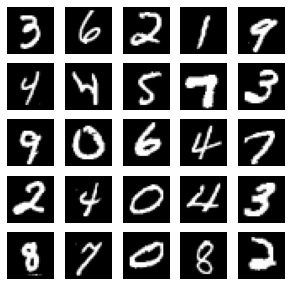

In [10]:
indexes = np.random.randint(0, len(x_train), size=25)
images = x_train[indexes]

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(np.reshape(images[i],(28,28)), cmap='gray')
    plt.axis('off')
plt.show()


In [14]:
num_labels = 10
input_size = 28*28
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [17]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255

x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

## We need to build a w-- Network!

In [19]:
from keras.engine.sequential import Sequential
dropout = 0.45
hidden_nodes = 256
batch_size = 128
model = Sequential()
model.add(Dense(hidden_nodes, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(hidden_nodes))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(hidden_nodes))
model.add(Activation('softmax'))
model.add(Dropout(dropout))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

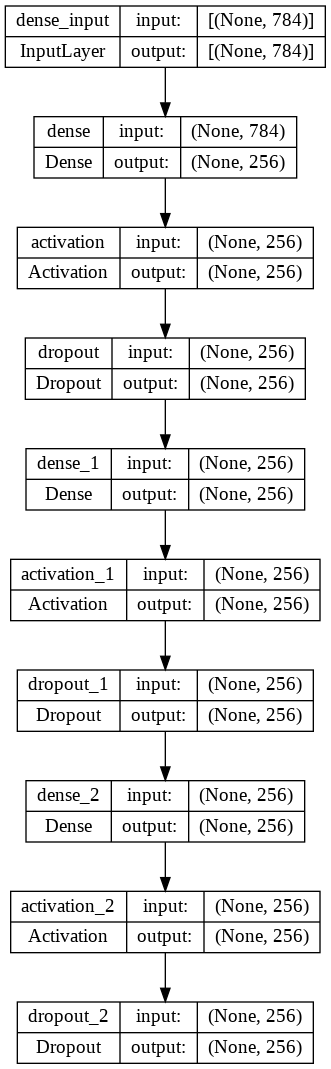

In [21]:
plot_model(model, show_shapes=True)